<a href="https://colab.research.google.com/github/240609/MLF/blob/main/ConvolutionalNN/ConvolutionalNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0. Import libraries**

In [28]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

dataset = 'sample_data/mnist_data_sample.png'



font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

**1. Dataset**

(60000, 28, 28) (10000, 28, 28)


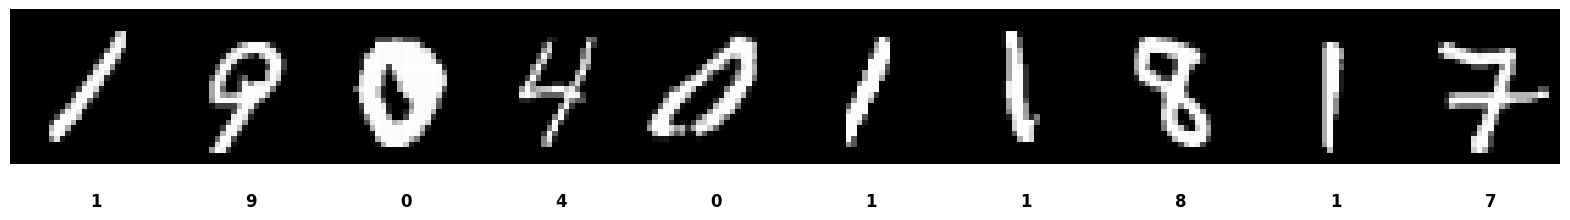

(10000, 28, 28, 1) (10000, 10)


In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

display_random_images(X_train, y_train)


X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(X_test.shape, y_test.shape)

**2. Build the model**

In [30]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


loss = 'categorical_crossentropy'
metrics = ['accuracy']
learning_rate = 0.01

optimizer = Adam(learning_rate=learning_rate)
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         346,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,690 (1.33 MB)

 Trainable params: 347,690 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

**3. Training stage**

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test), verbose=2, callbacks=[early_stopping])



Epoch 1/20
469/469 - 21s - 45ms/step - accuracy: 0.9520 - loss: 0.1551 - val_accuracy: 0.9799 - val_loss: 0.0648
Epoch 2/20
469/469 - 20s - 42ms/step - accuracy: 0.9808 - loss: 0.0616 - val_accuracy: 0.9807 - val_loss: 0.0606
Epoch 3/20
469/469 - 18s - 39ms/step - accuracy: 0.9847 - loss: 0.0480 - val_accuracy: 0.9808 - val_loss: 0.0629
Epoch 4/20
469/469 - 22s - 47ms/step - accuracy: 0.9868 - loss: 0.0414 - val_accuracy: 0.9845 - val_loss: 0.0527
Epoch 5/20
469/469 - 19s - 40ms/step - accuracy: 0.9864 - loss: 0.0431 - val_accuracy: 0.9828 - val_loss: 0.0640
Epoch 6/20
469/469 - 22s - 47ms/step - accuracy: 0.9884 - loss: 0.0381 - val_accuracy: 0.9817 - val_loss: 0.0741
Epoch 7/20
469/469 - 19s - 41ms/step - accuracy: 0.9891 - loss: 0.0364 - val_accuracy: 0.9834 - val_loss: 0.0746


**4. Model evaluation**

(10000, 28, 28, 1) (10000, 10)
Test loss: 0.07462247461080551
Test accuracy: 98.33999872207642 %


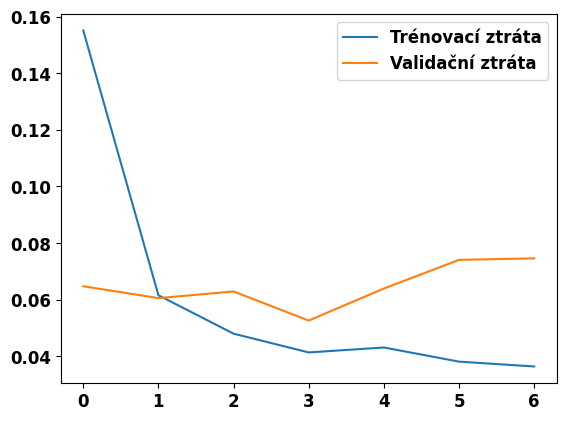

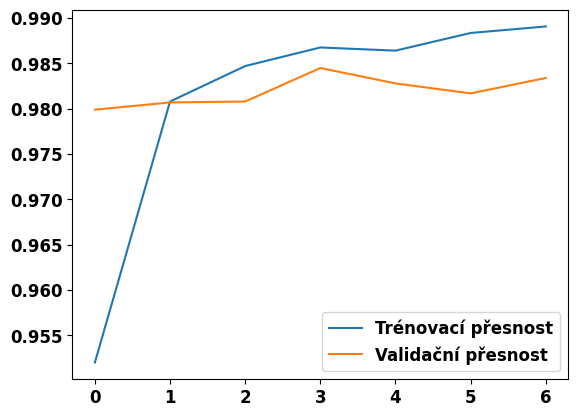

In [32]:

print(X_test.shape, y_test.shape)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

plt.figure()
plt.plot(history.history['loss'], label='Trénovací ztráta')
plt.plot(history.history['val_loss'], label='Validační ztráta')
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], label='Trénovací přesnost')
plt.plot(history.history['val_accuracy'], label='Validační přesnost')
plt.legend()



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


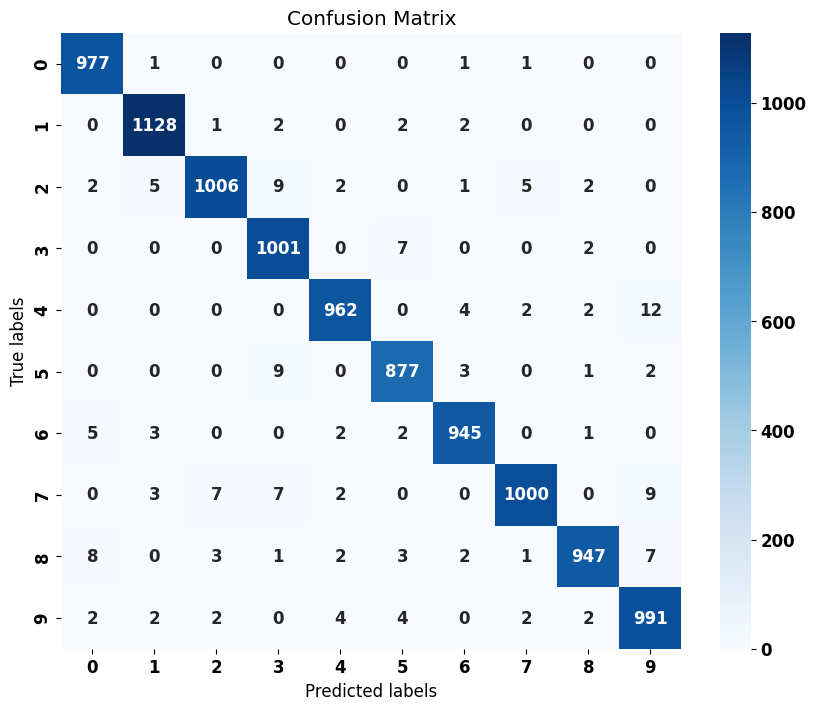

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()